In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import KFold
from google.colab import drive
drive.mount('/content/drive')
import csv
import pandas as pd
import matplotlib.pyplot as plt

Mounted at /content/drive


In [ ]:
NumSplits = 5
data_path = '/content/drive/MyDrive/Public_New'
categories = {
    'Others': 'Others',
    'Honda': 'Honda',
    'Suzuki': 'Suzuki',
    'Hyundai': 'Hyundai',
    'VinFast': 'VinFast',
    'KIA': 'KIA',
    'Mazda': 'Mazda',
    'Mitsubishi': 'Mitsubishi',
    'Toyota': 'Toyota'
}

In [ ]:
output_file = '/content/drive/MyDrive/Testing_Dataset/CarDataset.csv'
with open(output_file, 'w', newline='') as file:
    writer = csv.writer(file)
    for category in os.listdir(data_path):
        category_path = os.path.join(data_path, category)
        if os.path.isdir(category_path) and category in categories:
            for image_file in os.listdir(category_path):
                if image_file.split('.')[-1].lower() == 'jpg':
                    image_full_path = f'{category}/{image_file}'
                    category_id = categories[category]
                    writer.writerow([image_full_path, category_id])
print(f"File CarDataset.csv đã được tạo tại: {output_file}")

File CarDataset.csv đã được tạo tại: /content/drive/MyDrive/Testing_Dataset/CarDataset.csv


In [ ]:
X = []
y = []
for category in os.listdir(data_path):
  category_path = os.path.join(data_path,category)
  if os.path.isdir(category_path):
    for image_dir in os.listdir(category_path):
      if image_dir.split('.')[-1].lower() in ['png', 'jpg', 'jpeg']:
        X.append(os.path.join(category, image_dir))
        y.append(categories[category])

In [ ]:
kf = KFold(n_splits=NumSplits, shuffle=True, random_state=42)
for i, (train_index, test_index) in enumerate(kf.split(X)):
  with open(f'/content/drive/MyDrive/Testing_Dataset/CarDataset-Splits-{i+1}-Train.csv', 'w', newline='') as file:
      writer = csv.writer(file)
      for item in train_index:
          writer.writerow([X[item], y[item]])
  with open(f'/content/drive/MyDrive/Testing_Dataset/CarDataset-Splits-{i+1}-Test.csv', 'w', newline='') as file:
      writer = csv.writer(file)
      for item in test_index:
          writer.writerow([X[item], y[item]])

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Testing_Dataset/CarDataset-Splits-1-Train.csv')
df.columns = ['image_dir', 'category_id']
df

,image_dir,category_id
0,Honda/22520394-22520395.Honda.204.jpg,Honda
1,Honda/22520394-22520395.Honda.207.jpg,Honda
2,Honda/22520394-22520395.Honda.100.jpg,Honda
3,Honda/22520394-22520395.Honda.52.jpg,Honda
4,Honda/22520394-22520395.Honda.57.jpg,Honda
...,...,...
27936,Toyota/22521027-22520195-22521060.Toyota.1442.jpg,Toyota
27937,Toyota/22521027-22520195-22521060.Toyota.1434.jpg,Toyota
27938,Toyota/22521027-22520195-22521060.Toyota.1470.jpg,Toyota
27939,Toyota/22521027-22520195-22521060.Toyota.1464.jpg,Toyota


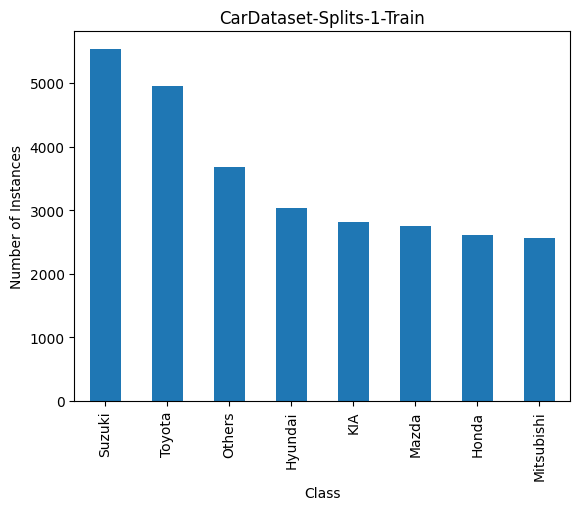

In [ ]:
class_counts = df['category_id'].value_counts()

# Bước 3: Visualize số lượng đối tượng của mỗi class
class_counts.plot(kind='bar')
plt.title('CarDataset-Splits-1-Train')
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.show()

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Public_New/CarDataset-Splits-1-Test.csv')
df.columns = ['image_dir', 'category_id']
df

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Public_New/CarDataset-Splits-1-Test.csv'

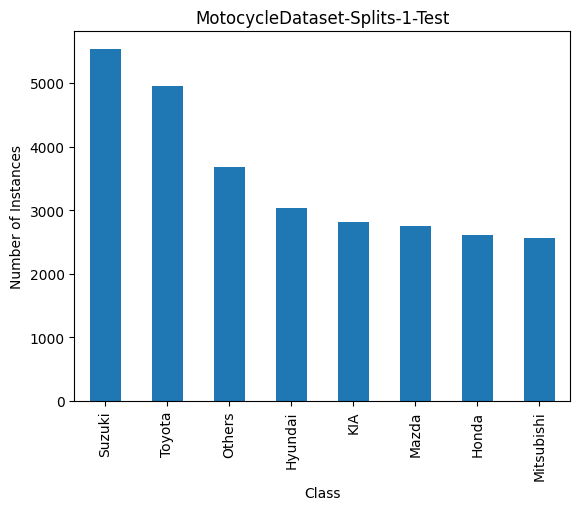

In [ ]:
class_counts = df['category_id'].value_counts()

# Bước 3: Visualize số lượng đối tượng của mỗi class
class_counts.plot(kind='bar')
plt.title('MotocycleDataset-Splits-1-Test')
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.show()